In [35]:
import cv2
import time

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [25, 10]

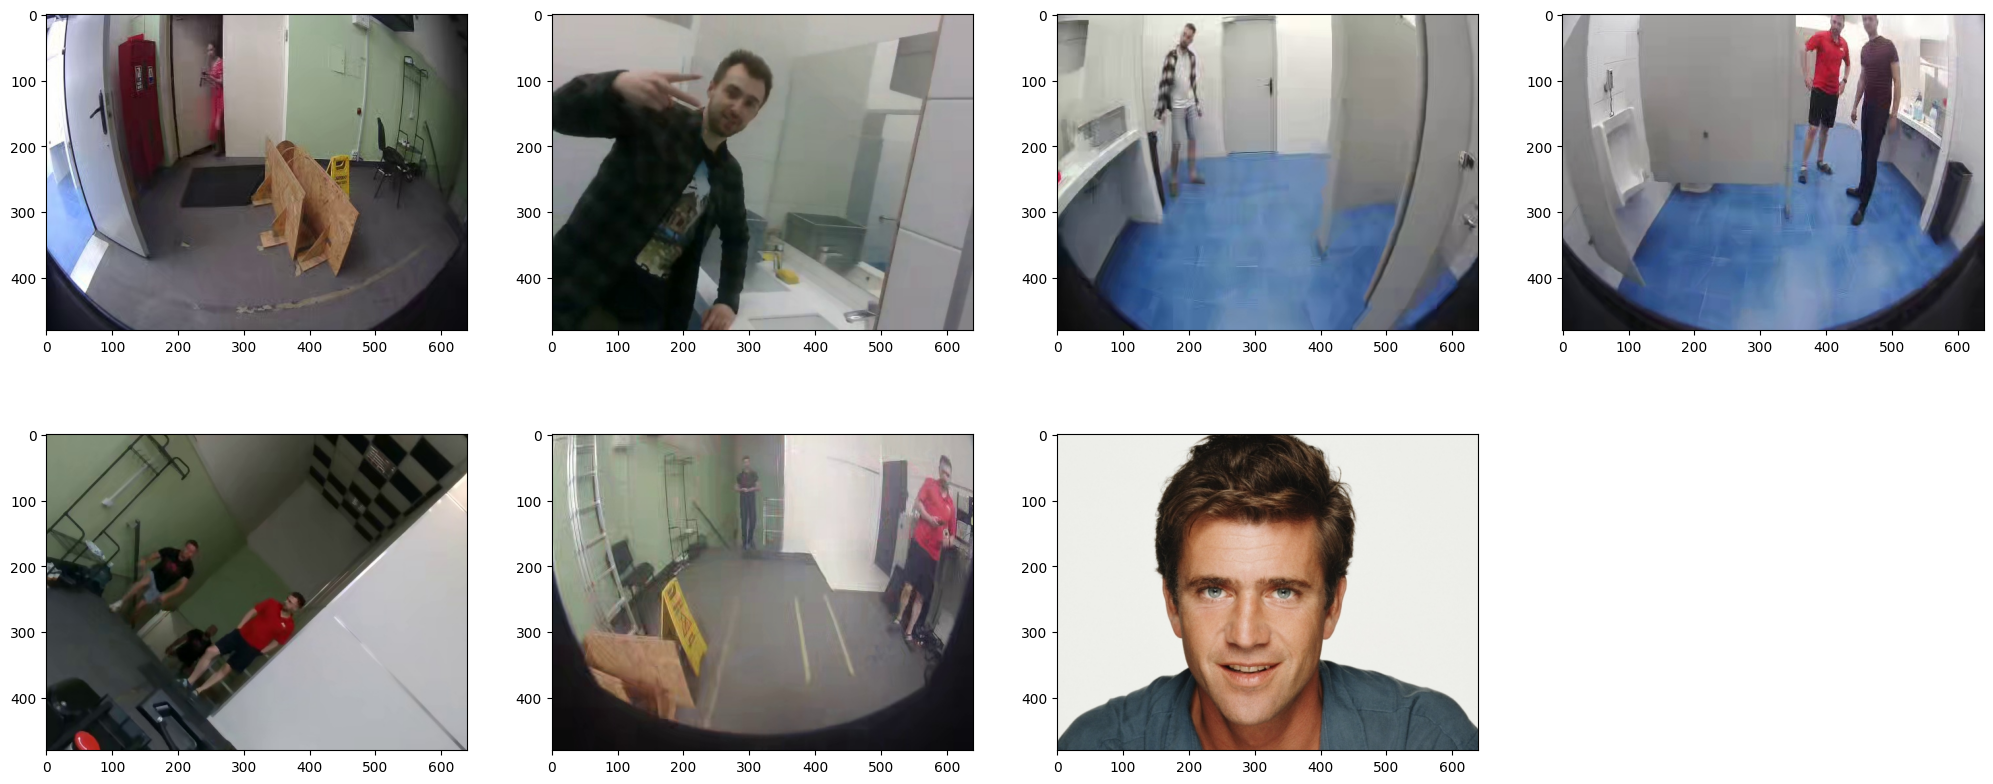

In [37]:
image_paths = [
    "../../data/public/images/20.jpg",
    "../../data/public/images/50.jpg",
    "../../data/public/images/71.jpg",
    "../../data/public/images/90.jpg",
    "../../data/public/images/834.jpg",
    "../../data/public/images/1170.jpg",
    "../../data/public/images/clear-face.jpg"
]
cnt = 0
for path in image_paths:
    cnt += 1
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, cnt)
    plt.imshow(image)

## Haar Cascade

In [38]:
casc_path = "../models/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(casc_path)

for path in image_paths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start_time = time.time()
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    end_time = time.time()
    print("faces detected:", len(faces), ", time: ", (end_time - start_time) * 1000, "ms")

faces detected: 0 , time:  27.079343795776367 ms
faces detected: 0 , time:  15.200376510620117 ms
faces detected: 0 , time:  11.832237243652344 ms
faces detected: 0 , time:  14.716863632202148 ms
faces detected: 0 , time:  16.09969139099121 ms
faces detected: 0 , time:  16.186952590942383 ms
faces detected: 1 , time:  15.784263610839844 ms


Very poor performance on my images, no point to continue

## Yunet

faces detected: 0 , time:  15.784263610839844 ms
faces detected: 0 , time:  15.784263610839844 ms
faces detected: 0 , time:  15.784263610839844 ms
faces detected: 0 , time:  15.784263610839844 ms
faces detected: 0 , time:  15.784263610839844 ms
faces detected: 0 , time:  15.784263610839844 ms
faces detected: 1 , time:  15.784263610839844 ms


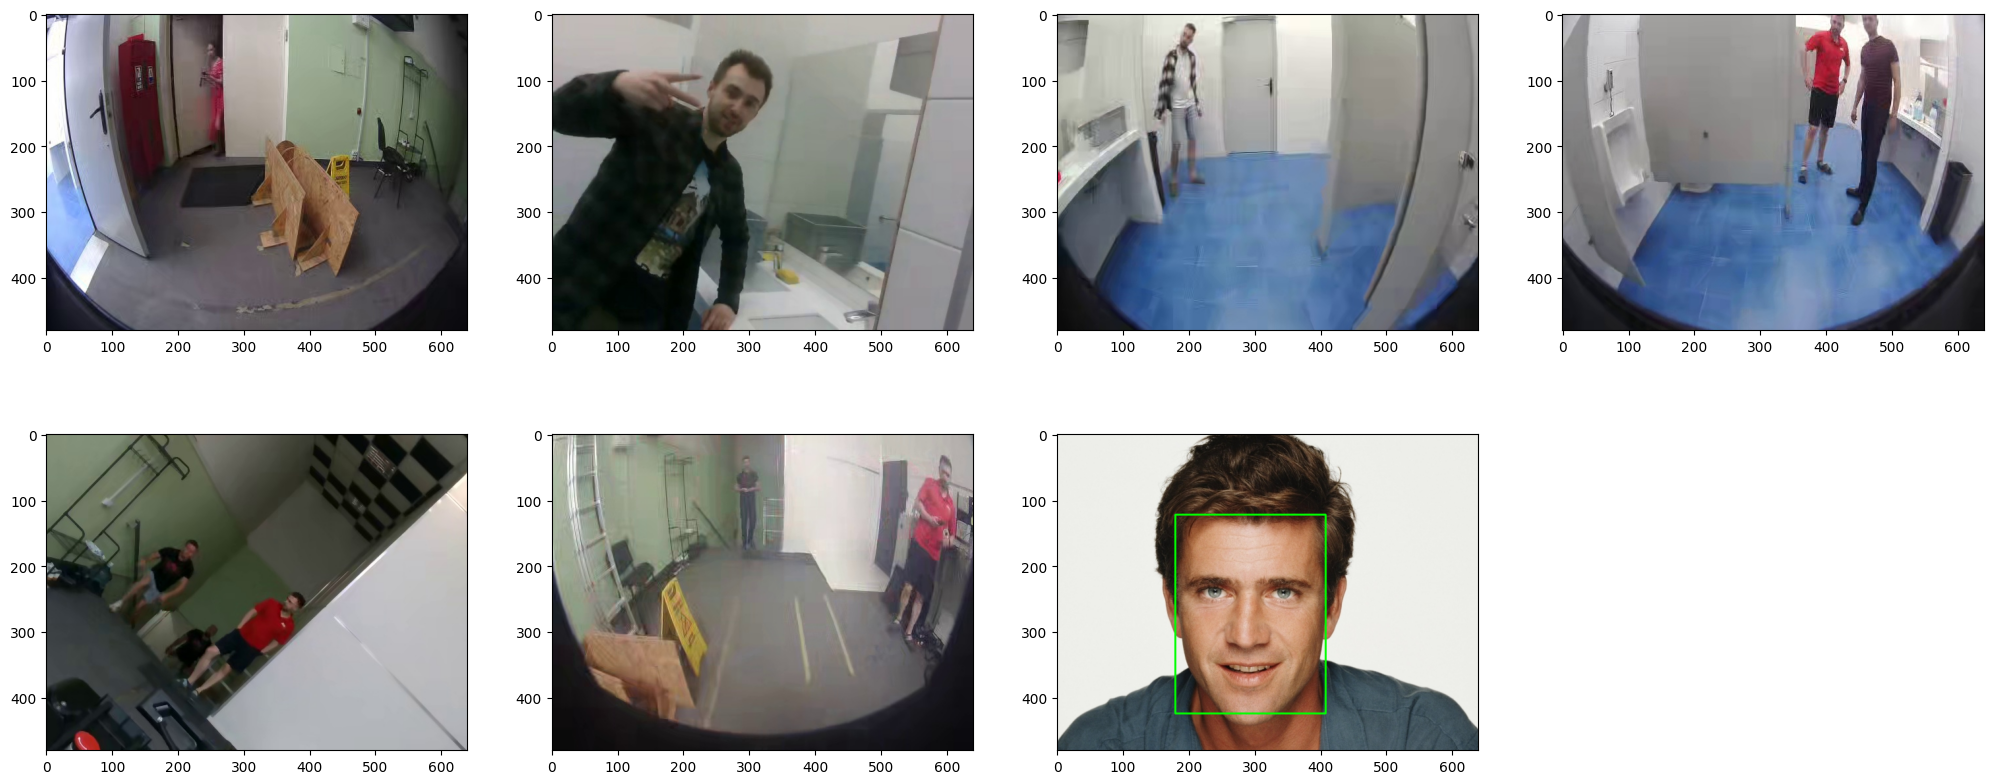

In [49]:
size = (640, 480)
face_detector = cv2.FaceDetectorYN_create("../models/face_detection_yunet_2023mar.onnx", "", size)
face_detector.setInputSize(size)

cnt = 0
for path in image_paths:
    cnt += 1
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    start = time.time()
    faces = face_detector.detect(image)
    end = time.time()

    if faces[1] is not None:
        for face in faces[1]:
            box = face[:4].astype(int)
            cv2.rectangle(image, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2)
    length = len(faces[1]) if faces[1] is not None else 0
    print("faces detected:", length, ", time: ", (end_time - start_time) * 1000, "ms")

    plt.subplot(2, 4, cnt)
    plt.imshow(image)

Very poor performance on my images, no point to continue

faces detected: 0 , time:  4075.490951538086 ms
faces detected: 1 , time:  4092.3454761505127 ms
faces detected: 0 , time:  4089.2534255981445 ms
faces detected: 0 , time:  4066.751718521118 ms
faces detected: 0 , time:  4085.728168487549 ms
faces detected: 0 , time:  4080.199718475342 ms
faces detected: 1 , time:  4071.2461471557617 ms


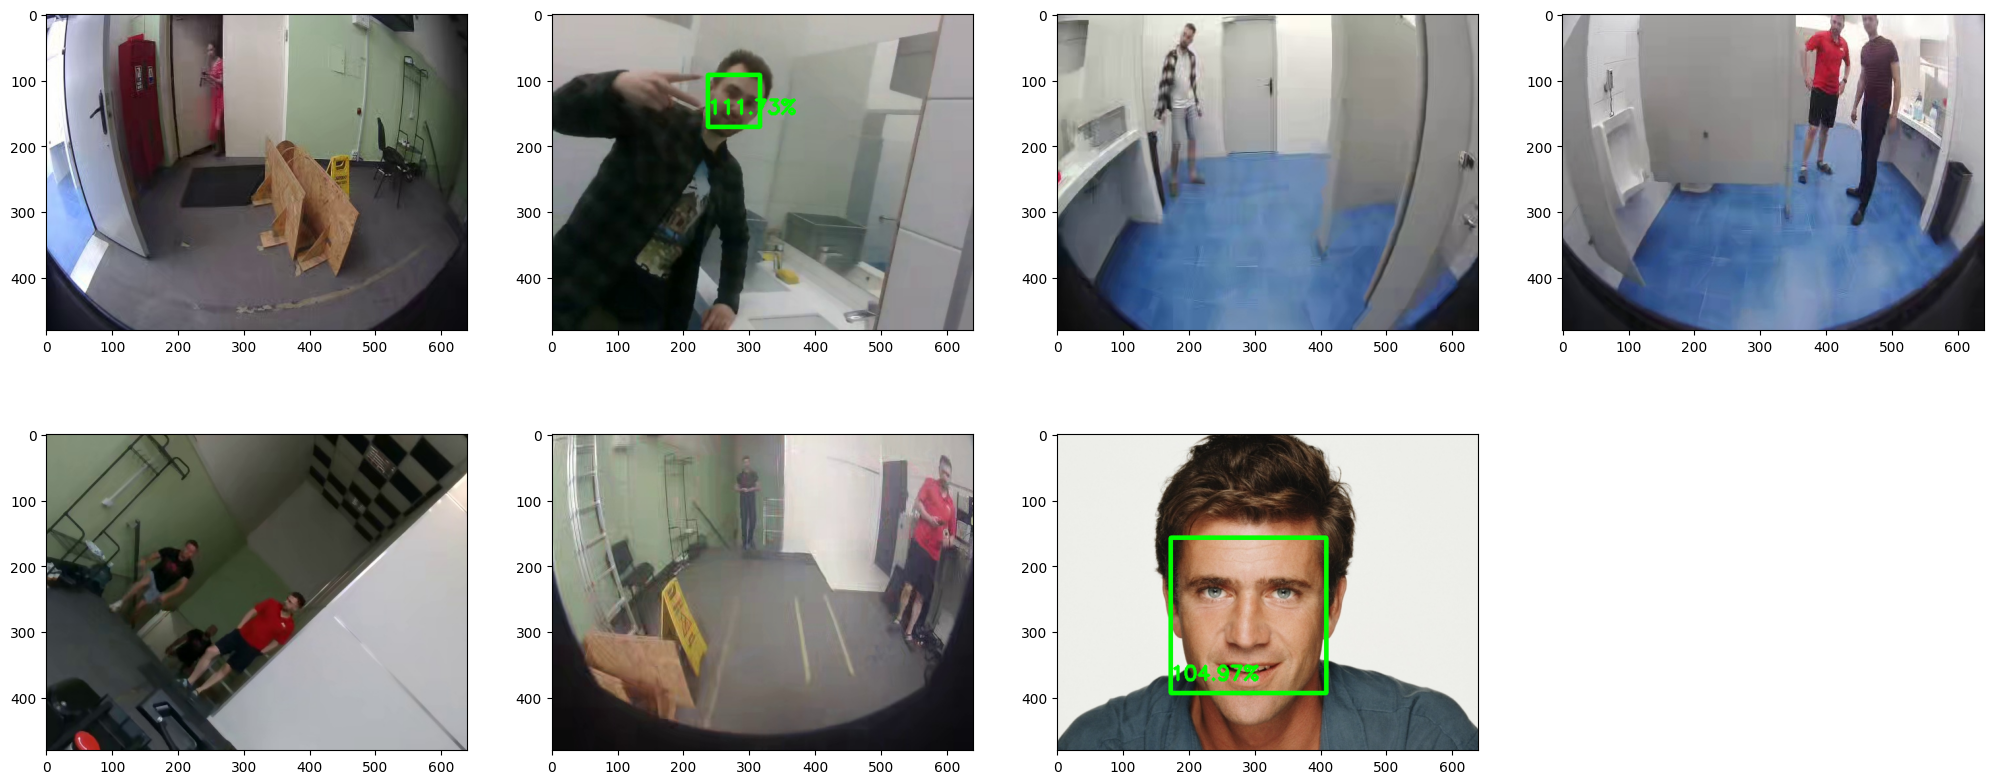

In [54]:
import dlib

detector = dlib.cnn_face_detection_model_v1("../models/mmod_human_face_detector.dat")

cnt = 0
for path in image_paths:
    cnt += 1
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    start_time = time.time()
    faces = detector(image)
    end_time = time.time()

    for face in faces:
        x1 = face.rect.left()
        y1 = face.rect.bottom()
        x2 = face.rect.right()
        y2 = face.rect.top()
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        conf = face.confidence
        text = f"{conf*100:.2f}%"
        cv2.putText(image, text, (x1, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), thickness=4)

    length = len(faces)
    print("faces detected:", length, ", time: ", (end_time - start_time) * 1000, "ms")

    plt.subplot(2, 4, cnt)
    plt.imshow(image)

Poor performance on my images, and very high inference time

## RetinaFace

In [55]:
from retinaface import RetinaFace

2024-08-06 20:53:02.127644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 20:53:02.309444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 20:53:02.311068: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 20:53:02.619594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 20:53:03.736316: W tensorflow/compiler/tf

2024-08-06 20:54:43.976908: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-06 20:54:44.005747: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


faces detected: 0 , time:  13456.966876983643 ms
faces detected: 1 , time:  174.82256889343262 ms
faces detected: 1 , time:  177.24227905273438 ms
faces detected: 2 , time:  171.68450355529785 ms
faces detected: 1 , time:  171.67210578918457 ms
faces detected: 2 , time:  167.42253303527832 ms
faces detected: 1 , time:  169.4948673248291 ms


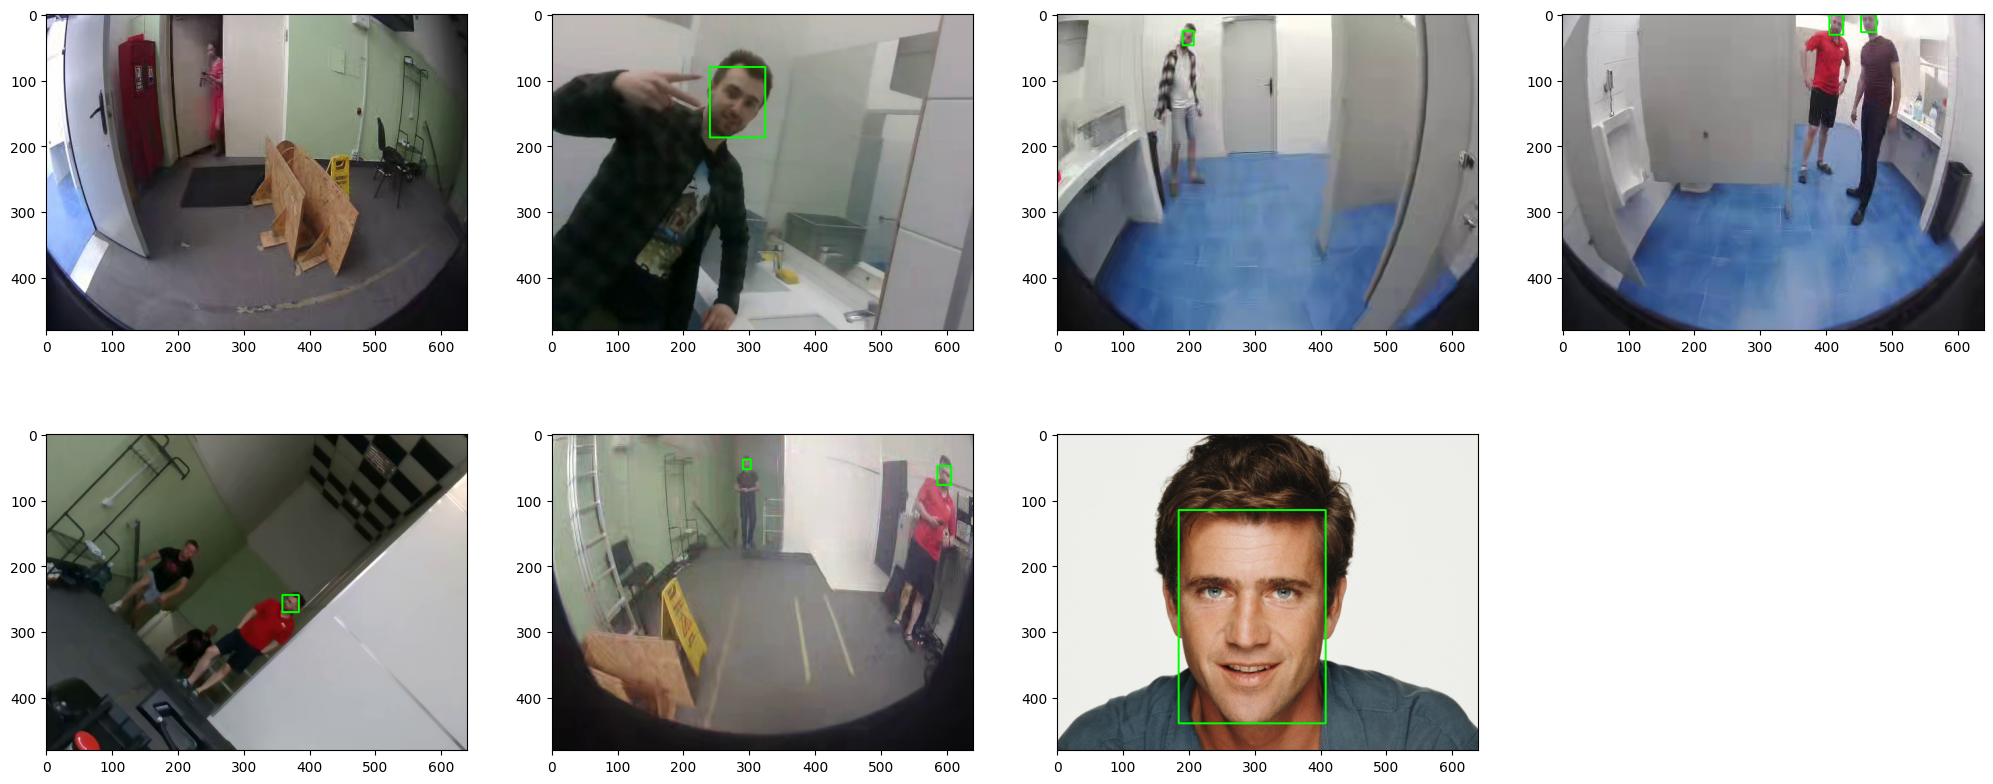

In [56]:
cnt = 0
for path in image_paths:
    cnt += 1
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    start = time.time()
    faces = RetinaFace.detect_faces(path, threshold=0.4, allow_upscaling=False)
    end = time.time()

    length = 0
    for key in faces.keys():
        length += 1
        face = faces[key]
        facial_area = face["facial_area"]
        cv2.rectangle(
            image,
            (facial_area[2], facial_area[3]),
            (facial_area[0], facial_area[1]),
            (0, 255, 0),
            2,
        )

    print("faces detected:", length, ", time: ", (end - start) * 1000, "ms")

    plt.subplot(2, 4, cnt)
    plt.imshow(image)

Compared to the previous detectors, this is much better detector for these kind of images

## DSFD
https://github.com/hukkelas/DSFD-Pytorch-Inference

In [57]:
import cv2
import face_detection

print(face_detection.available_detectors)
detector = face_detection.build_detector(
    "DSFDDetector", confidence_threshold=0.5, nms_iou_threshold=0.3, fp16_inference=True
)

['DSFDDetector', 'RetinaNetResNet50', 'RetinaNetMobileNetV1']


faces detected: 1 , time:  47.24574089050293 ms
faces detected: 1 , time:  33.69593620300293 ms
faces detected: 1 , time:  33.62154960632324 ms
faces detected: 2 , time:  36.069393157958984 ms
faces detected: 2 , time:  33.77509117126465 ms
faces detected: 1 , time:  31.68463706970215 ms
faces detected: 1 , time:  32.77230262756348 ms


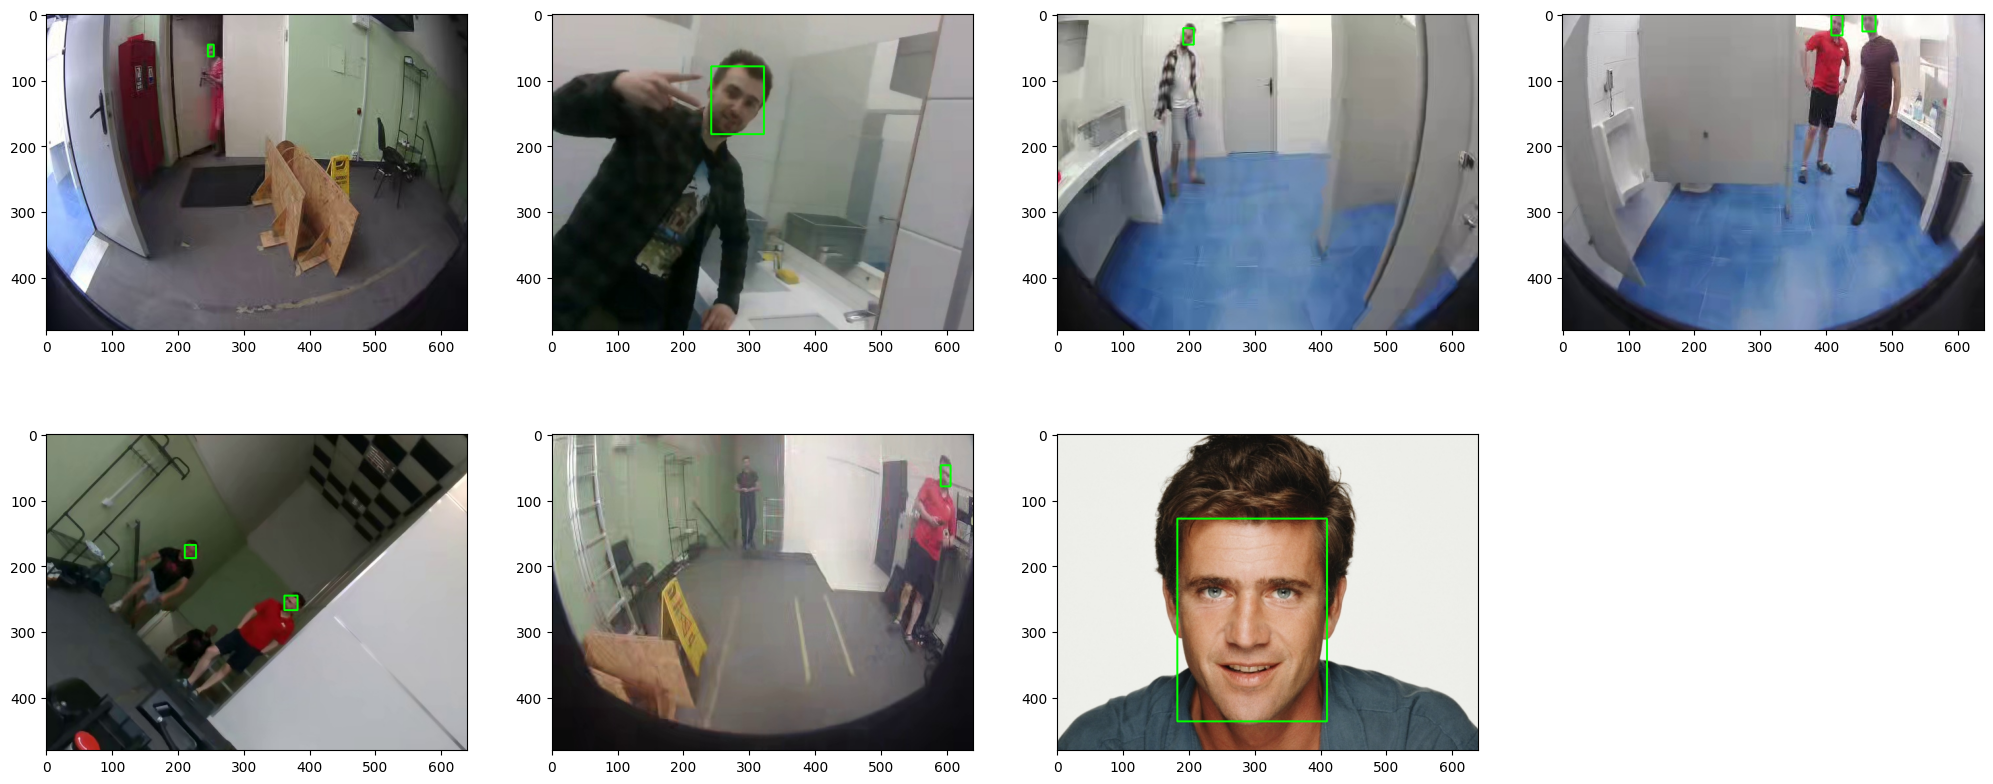

In [59]:
cnt = 0
for path in image_paths:
    cnt += 1
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    start = time.time()
    detections = detector.detect(image)
    end = time.time()

    for detection in detections:
        cv2.rectangle(
            image,
            (int(detection[0]), int(detection[1])),
            (int(detection[2]), int(detection[3])),
            (0, 255, 0),
            2,
        )

    print("faces detected:", len(detections), ", time: ", (end - start) * 1000, "ms")

    plt.subplot(2, 4, cnt)
    plt.imshow(image)

This model has a pretty good accuracy and better inference time compared to RetinaFace. But it runs on GPU, on CPU it will run very slowly.